<a href="https://colab.research.google.com/github/hrai/M4-Data-Analysis/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-07.csv'
df = pd.read_csv(url, parse_dates={'DateTime': ['Date', 'IntervalStart']})


In [3]:
count_row,count_col=df.shape

print('Total rows: ' + str(count_row))

df[:10]

Total rows: 94948


,DateTime,AssetID,FinancialQtrID,IntervalEnd,Version,VehicleClass,TollPointID,GantryDirection,GantryLocation,GantryGPSLatitude,GantryGPSLongitude,GantryType,TotalVolume
0,2018-07-01,M4,201901,00:14,3,Car,TS0101,W,Church St Exit,-33.83,151.00,Mainline,310
1,2018-07-01,M4,201901,00:14,3,Truck,TS0101,W,Church St Exit,-33.83,151.00,Mainline,4
2,2018-07-01,M4,201901,00:14,3,Car,TS0102,E,Church St Entry,-33.83,151.00,Mainline,120
3,2018-07-01,M4,201901,00:14,3,Truck,TS0102,E,Church St Entry,-33.83,151.00,Mainline,2
4,2018-07-01,M4,201901,00:14,3,Car,TS0201,W,James Ruse Dr Entry,-33.83,151.02,Ramp,23
5,2018-07-01,M4,201901,00:14,3,Car,TS0202,E,James Ruse Dr Exit,-33.83,151.02,Ramp,4
6,2018-07-01,M4,201901,00:14,3,Car,TS0301,E,James Ruse Dr Entry,-33.83,151.02,Ramp,43
7,2018-07-01,M4,201901,00:14,3,Car,TS0401,W,James Ruse Dr Exit,-33.83,151.04,Ramp,81
8,2018-07-01,M4,201901,00:14,3,Car,TS0501,E,Silverwater Rd Exit,-33.84,151.04,Ramp,20
9,2018-07-01,M4,201901,00:14,3,Car,TS0601,W,Silverwater Rd Entry,-33.84,151.04,Ramp,39


In [4]:

total_vehicles=df['TotalVolume'].sum()
total_vehicles

8583621

In [5]:
df.columns

Index(['DateTime', 'AssetID', 'FinancialQtrID', 'IntervalEnd', 'Version',
       'VehicleClass', 'TollPointID', 'GantryDirection', 'GantryLocation',
       'GantryGPSLatitude', 'GantryGPSLongitude', 'GantryType', 'TotalVolume'],
      dtype='object')

In [6]:
total_cars = df.loc[df['VehicleClass']=='Car', 'VehicleClass'].value_counts()
print(f"total cars rows {total_cars}")

total_trucks = df.loc[df['VehicleClass']=='Truck', 'VehicleClass'].value_counts()
print(f"total trucks rows {total_trucks}")


total cars rows Car    49555
Name: VehicleClass, dtype: int64
total trucks rows Truck    45393
Name: VehicleClass, dtype: int64


## Check for null values



In [7]:
df.isnull().values.any()

False

## Rename column

In [8]:
df.rename(columns={'TotalVolume': 'TotalTrafficVolume', 'VehicleClass':'VehicleType'}, inplace=True)
df.columns

Index(['DateTime', 'AssetID', 'FinancialQtrID', 'IntervalEnd', 'Version',
       'VehicleType', 'TollPointID', 'GantryDirection', 'GantryLocation',
       'GantryGPSLatitude', 'GantryGPSLongitude', 'GantryType',
       'TotalTrafficVolume'],
      dtype='object')

In [9]:
df.values

array([[Timestamp('2018-07-01 00:00:00'), 'M4', 201901, ..., 151.0,
        'Mainline', 310],
       [Timestamp('2018-07-01 00:00:00'), 'M4', 201901, ..., 151.0,
        'Mainline', 4],
       [Timestamp('2018-07-01 00:00:00'), 'M4', 201901, ..., 151.0,
        'Mainline', 120],
       ...,
       [Timestamp('2018-07-31 23:45:00'), 'M4', 201901, ..., 151.07,
        'Ramp', 24],
       [Timestamp('2018-07-31 23:45:00'), 'M4', 201901, ..., 151.07,
        'Ramp', 5],
       [Timestamp('2018-07-31 23:45:00'), 'M4', 201901, ..., 151.07,
        'Mainline + G', 17]], dtype=object)

##Scatter plot of latitude and longitude

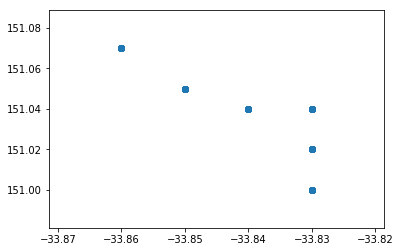

In [10]:
plt.scatter(x=df['GantryGPSLatitude'], y=df['GantryGPSLongitude'])
plt.show()

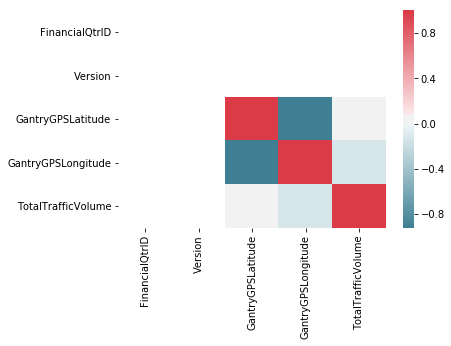

In [14]:
##Temp-remove - correlation heatmap
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))


## Checking latitute and longitude against GantryLocation

In [0]:
temp_df=df[['GantryLocation','GantryGPSLatitude','GantryGPSLongitude','TollPointID']].groupby(by=['GantryLocation'])
print(temp_df.first())

                            GantryGPSLatitude  GantryGPSLongitude TollPointID
GantryLocation                                                               
Church St Entry                        -33.83              151.00      TS0102
Church St Exit                         -33.83              151.00      TS0101
Hill Rd Entry                          -33.85              151.05      TS1001
Hill Rd Exit                           -33.85              151.05      TS0901
Homebush Bay Dr (NB) Entry             -33.86              151.07      TS1301
Homebush Bay Dr Entry                  -33.86              151.07      TS1401
Homebush Bay Dr Exit                   -33.86              151.07      TS1201
James Ruse Dr Entry                    -33.83              151.02      TS0201
James Ruse Dr Exit                     -33.83              151.02      TS0202
Silverwater Rd Entry                   -33.84              151.04      TS0601
Silverwater Rd Exit                    -33.84              151.0

In [0]:
print(df['AssetID'].unique())
print(df['Version'].unique())
print(df['FinancialQtrID'].unique())
#print(df['Date'].unique())

['M4']
[3]
[201901]


## Drop unwanted columns like latitude and longitude

In [0]:
df.drop(['GantryGPSLatitude', 'GantryGPSLongitude','AssetID', 'Version','TollPointID','FinancialQtrID'], axis = 1, inplace=True)
df.columns

Index(['DateTime', 'IntervalEnd', 'VehicleType', 'GantryDirection',
       'GantryLocation', 'GantryType', 'TotalTrafficVolume'],
      dtype='object')

In [0]:
df['GantryLocation'].unique()

array(['Church St Exit', 'Church St Entry', 'James Ruse Dr Entry',
       'James Ruse Dr Exit', 'Silverwater Rd Exit',
       'Silverwater Rd Entry', 'Hill Rd Exit', 'Hill Rd Entry',
       'Homebush Bay Dr Exit', 'Homebush Bay Dr (NB) Entry',
       'Homebush Bay Dr Entry'], dtype=object)

In [0]:
df['VehicleType'].unique()

array(['Car', 'Truck'], dtype=object)

In [0]:
df['GantryType'].unique()

array(['Mainline', 'Ramp', 'Mainline + G'], dtype=object)

In [0]:
group_by_gantry_type = df[['GantryType', 'VehicleType','TotalTrafficVolume']].groupby(by=['GantryType', 'VehicleType'])
group_by_gantry_type.head(2)


,GantryType,VehicleType,TotalTrafficVolume
0,Mainline,Car,310
1,Mainline,Truck,4
2,Mainline,Car,120
3,Mainline,Truck,2
4,Ramp,Car,23
5,Ramp,Car,4
10,Ramp,Truck,1
13,Ramp,Truck,1
22,Mainline + G,Car,266
23,Mainline + G,Truck,3


In [0]:
car_data_avg = group_by_gantry_type.mean()
car_data_count = group_by_gantry_type.count()

print(car_data_avg.head(2))
print(car_data_count)

car_data_count

                        TotalTrafficVolume
GantryType VehicleType                    
Mainline   Car                  411.044388
           Truck                 36.510095
                          TotalTrafficVolume
GantryType   VehicleType                    
Mainline     Car                        8651
             Truck                      8618
Mainline + G Car                        2961
             Truck                      2862
Ramp         Car                       37943
             Truck                     33913


TotalTrafficVolume
GantryType   VehicleType                    
Mainline     Car                        8651
             Truck                      8618
Mainline + G Car                        2961
             Truck                      2862
Ramp         Car                       37943
             Truck                     33913

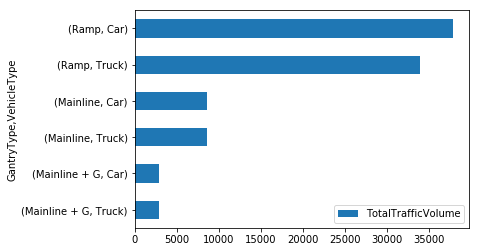

In [0]:
car_data_count.sort_values(by='TotalTrafficVolume').plot(kind='barh')

In [0]:
df.head()

#df.shape[0]

,DateTime,IntervalEnd,VehicleType,GantryDirection,GantryLocation,GantryType,TotalTrafficVolume
0,2018-07-01,00:14,Car,W,Church St Exit,Mainline,310
1,2018-07-01,00:14,Truck,W,Church St Exit,Mainline,4
2,2018-07-01,00:14,Car,E,Church St Entry,Mainline,120
3,2018-07-01,00:14,Truck,E,Church St Entry,Mainline,2
4,2018-07-01,00:14,Car,W,James Ruse Dr Entry,Ramp,23


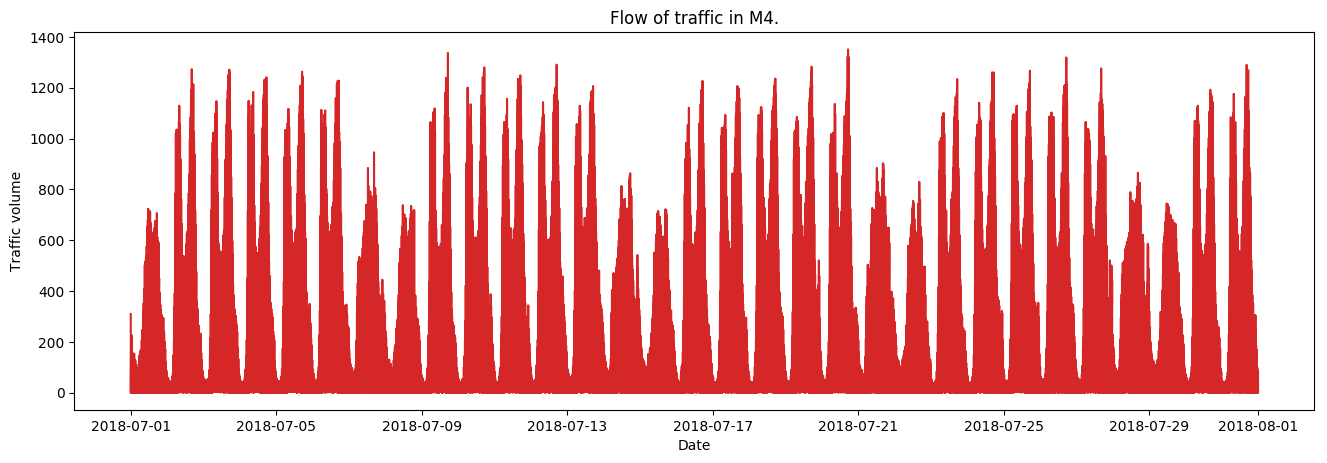

In [0]:

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Traffic volume', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['DateTime'], y=df['TotalTrafficVolume'], title='Flow of traffic in M4.') 

##Loading all M4 data for 2018-19

In [0]:
urls=[
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-07.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-08.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-09.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-10.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-11.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2018-12.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2019-01.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2019-02.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2019-03.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2019-04.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2019-05.csv',
'https://raw.githubusercontent.com/hrai/M4-Data-Analysis/master/data/M4_passages_2019-06.csv'
]

df_all = pd.concat(pd.read_csv(url, parse_dates={'DateTime': ['Date', 'IntervalStart']}) for url in urls)

In [0]:
rows,cols=df_all.shape
print(rows)

df_all.columns

1116404


Index(['DateTime', 'AssetID', 'FinancialQtrID', 'IntervalEnd', 'Version',
       'VehicleType', 'TollPointID', 'GantryDirection', 'GantryLocation',
       'GantryGPSLatitude', 'GantryGPSLongitude', 'GantryType',
       'TotalTrafficVolume'],
      dtype='object')

In [0]:

df_all.rename(columns={'TotalVolume': 'TotalTrafficVolume', 'VehicleClass':'VehicleType'}, inplace=True)
df_all.columns

Index(['DateTime', 'AssetID', 'FinancialQtrID', 'IntervalEnd', 'Version',
       'VehicleType', 'TollPointID', 'GantryDirection', 'GantryLocation',
       'GantryGPSLatitude', 'GantryGPSLongitude', 'GantryType',
       'TotalTrafficVolume'],
      dtype='object')

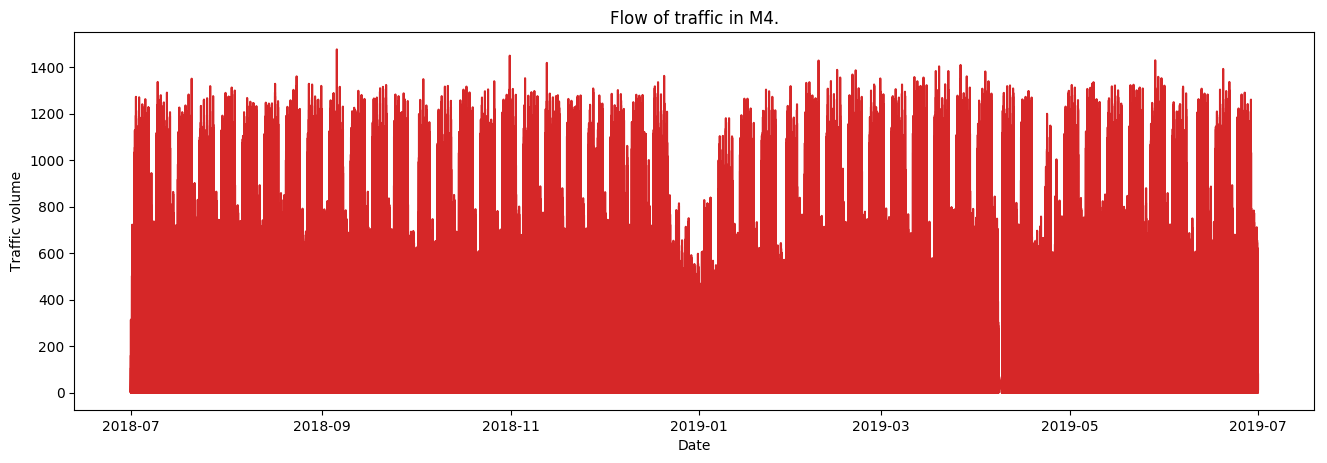

In [0]:

plot_df(df_all, x=df_all['DateTime'], y=df_all['TotalTrafficVolume'], title='Flow of traffic in M4.') 